# 寶玉屬性加成模擬器 (0～10級)

依照指定的機率表，模擬在遊戲中從 0 級衝到指定目標等級 (最多至 10 級) 所需的花費。

每次強化行為需消耗1億楓幣，若成功則等級 +1、失敗則等級 -1 (不低於0)、重置則等級歸0。

我們可以重複執行多次模擬，統計平均花費、最大、最小花費等資訊。

---


In [13]:
import random
import statistics


# --------------------------------------------------------
# 1. Define probabilities for each level (current_level → current_level+1)
#    The key = current_level + 1, meaning the chance to go from current_level to next level
# --------------------------------------------------------

#TODO: Probabilities of 8 to 9 and 9 to 10 are not sure, change to correction parameters after the official data publication. 
enhance_probabilities = {
    1 : {"success": 100, "failure": 0,   "reset": 0},   # from 0 to 1
    2 : {"success": 40,  "failure": 60,  "reset": 0},   # from 1 to 2
    3 : {"success": 40,  "failure": 55,  "reset": 5},   # from 2 to 3
    4 : {"success": 30,  "failure": 60,  "reset": 10},  # from 3 to 4
    5 : {"success": 30,  "failure": 60,  "reset": 10},  # from 4 to 5
    6 : {"success": 80,  "failure": 0,   "reset": 20},  # from 5 to 6
    7 : {"success": 40,  "failure": 40,  "reset": 20},  # from 6 to 7
    8 : {"success": 40,  "failure": 40,  "reset": 20},  # from 7 to 8
    9 : {"success": 30,  "failure": 40,  "reset": 30},  # from 8 to 9    
    10: {"success": 30,  "failure": 40,  "reset": 30},  # from 9 to 10
} 

MESO_PER_TRY = 1  # Cost of each enhancement attempt (Notice that there needs 100 million Meso per try.)

def simulate_enhancement_once(target_level):
    """
    Run one simulation from level 0 to 'target_level'.
    Returns the total Meso cost spent to reach that target level.
    """
    current_level = 0
    total_cost = 0

    while current_level < target_level:
        # Pay the cost first
        total_cost += MESO_PER_TRY
        
        # If the next level index goes beyond 10, break for safety
        if current_level + 1 > 10:
            break
        
        prob = enhance_probabilities[current_level + 1]
        
        # Random draw in the range [0, 100)
        rnd = random.random() * 100
        if rnd < prob["success"]:
            # Enhancement succeeds: level up by 1
            current_level += 1
        else:
            rnd2 = rnd - prob["success"]
            if rnd2 < prob["failure"]:
                # Enhancement fails: level down by 1 (not below 0)
                current_level = max(current_level - 1, 0)
            else:
                # Enhancement resets: level goes back to 0
                current_level = 0
    
    return total_cost


def simulate_enhancement(target_level, num_simulations=1000):
    """
    Repeat the enhancement simulation 'num_simulations' times.
    Return a list of total Meso costs for each simulation.
    """
    costs = []
    for _ in range(num_simulations):
        cost = simulate_enhancement_once(target_level)
        costs.append(cost)
    return costs


## 範例測試1

下面示範執行 1000 次從 0 衝到 10 級的模擬，並簡單列出平均花費、最大最小值。


In [ ]:
# 2. Run simulations (you can modify these parameters)
target_level = 10
num_sims = 1000

all_costs = simulate_enhancement(target_level, num_sims)

average_cost = statistics.mean(all_costs)
min_cost = min(all_costs)
max_cost = max(all_costs)

print(f"模擬次數: {num_sims}")
print(f"目標等級: {target_level}")
print(f"平均花費: {average_cost:.0f} E 楓幣")
print(f"最低花費: {min_cost} E 楓幣")
print(f"最高花費: {max_cost} E 楓幣")


模擬次數: 1000
目標等級: 10
平均花費: 3291 E 楓幣
最低花費: 30 E 楓幣
最高花費: 21019 E 楓幣


## 範例測試2

以下是分別以 7、8、9 和 10 作為目標等級進行測試的範例，每個目標等級進行 100,000 次模擬。每組模擬結束後，我們會繪製一個花費的分布圖，並列出第 25、50、75 百分位數以及平均成本。

目標等級：7
第 25 百分位數花費：71.0E 楓幣
第 50 百分位數花費：161.0E 楓幣
第 75 百分位數花費：315.0E 楓幣
平均花費：229.37855E 楓幣
最低花費: 7E 楓幣
最高花費: 2350E 楓幣
----------------------------------------


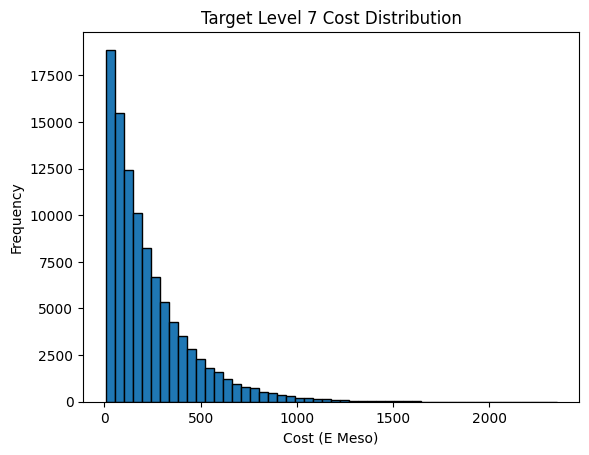

目標等級：8
第 25 百分位數花費：135.0E 楓幣
第 50 百分位數花費：308.0E 楓幣
第 75 百分位數花費：610.0E 楓幣
平均花費：442.03847E 楓幣
最低花費: 8E 楓幣
最高花費: 4412E 楓幣
----------------------------------------


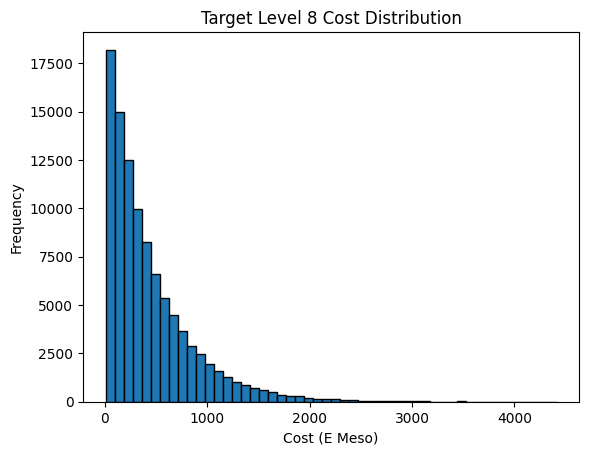

目標等級：9
第 25 百分位數花費：345.0E 楓幣
第 50 百分位數花費：814.0E 楓幣
第 75 百分位數花費：1620.0E 楓幣
平均花費：1171.5257E 楓幣
最低花費: 9E 楓幣
最高花費: 13000E 楓幣
----------------------------------------


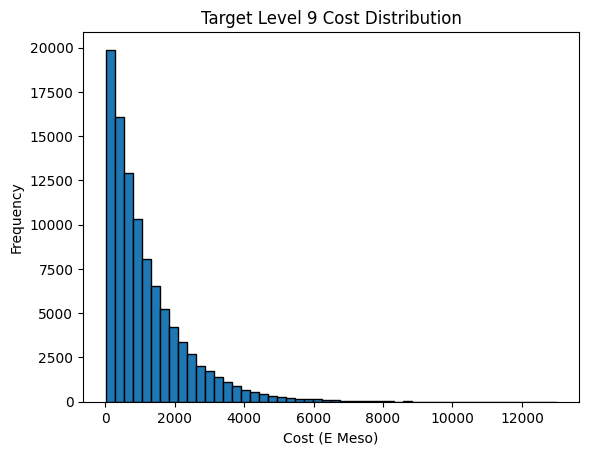

目標等級：10
第 25 百分位數花費：971.0E 楓幣
第 50 百分位數花費：2337.0E 楓幣
第 75 百分位數花費：4619.0E 楓幣
平均花費：3331.05917E 楓幣
最低花費: 10E 楓幣
最高花費: 36301E 楓幣
----------------------------------------


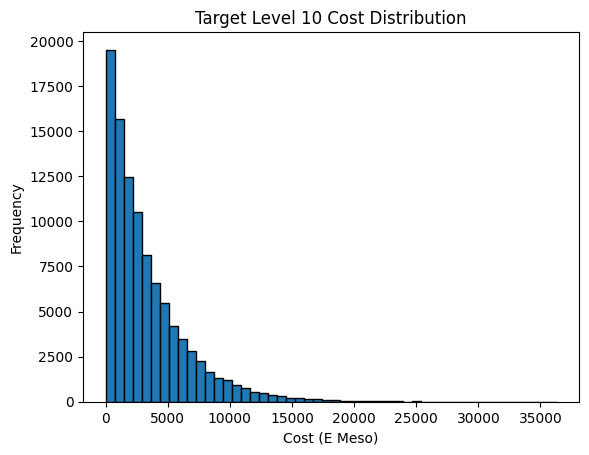

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# We want to test target_level = 7, 8, 9, 10
# Each with 100000 simulations
test_levels = [7, 8, 9, 10]
num_sims = 100000

for lvl in test_levels:
    costs = simulate_enhancement(lvl, num_sims)
    
    # Calculate 25th, 50th, 75th percentiles and mean
    p25 = np.percentile(costs, 25)
    p50 = np.percentile(costs, 50)
    p75 = np.percentile(costs, 75)
    avg = statistics.mean(costs)
    min_cost = min(costs)
    max_cost = max(costs)
    
    # Print results in Chinese
    print(f"目標等級：{lvl}")
    print(f"第 25 百分位數花費：{p25}E 楓幣")
    print(f"第 50 百分位數花費：{p50}E 楓幣")
    print(f"第 75 百分位數花費：{p75}E 楓幣")
    print(f"平均花費：{avg}E 楓幣")
    print(f"最低花費: {min_cost}E 楓幣")
    print(f"最高花費: {max_cost}E 楓幣")
    print("-" * 40)
    
    # Plot histogram in Chinese
    plt.hist(costs, bins=50, edgecolor='black')
    plt.title(f"Target Level {lvl} Cost Distribution")
    plt.xlabel("Cost (E Meso)")
    plt.ylabel("Frequency")
    plt.show()